1.A

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
df = pd.read_csv("Titanic-Dataset.csv")
print(df.head())

# Menghitung jumlah total penumpang
total_penumpang = df.shape[0]
print("Jumlah total penumpang dalam data adalah:", total_penumpang)




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ju

1.B

          Status  Jumlah
0  Tidak Selamat     549
1        Selamat     342


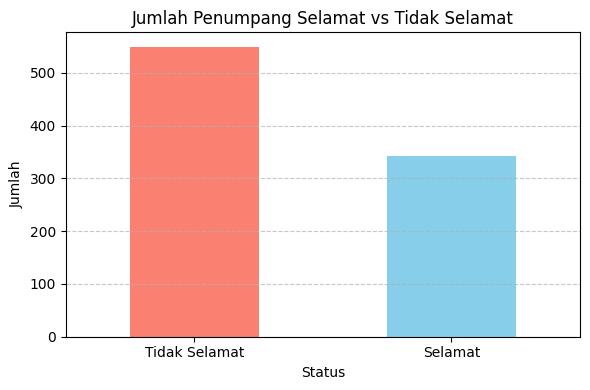

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Titanic-Dataset.csv")

# Menghitung jumlah yang selamat dan tidak selamat
survival_counts = df['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'})

# Menampilkan dalam bentuk tabel
survival_counts_df = survival_counts.reset_index()
survival_counts_df.columns = ['Status', 'Jumlah']
print(survival_counts_df)

# Menampilkan grafik batang
plt.figure(figsize=(6, 4))
survival_counts.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Jumlah Penumpang Selamat vs Tidak Selamat')
plt.ylabel('Jumlah')
plt.xlabel('Status')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


1.C

In [4]:
import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")

# Menghitung rata-rata umur (mengabaikan NaN)
rata_rata_umur = df['Age'].mean()
print(f"Rata-rata umur penumpang: {rata_rata_umur:.2f} tahun")

# penumpang termuda
termuda = df[df['Age'] == df['Age'].min()][['Name', 'Age']]
print("\nPenumpang termuda:")
print(termuda)

# penumpang tertua
tertua = df[df['Age'] == df['Age'].max()][['Name', 'Age']]
print("\nPenumpang tertua:")
print(tertua)


Rata-rata umur penumpang: 29.70 tahun

Penumpang termuda:
                                Name   Age
803  Thomas, Master. Assad Alexander  0.42

Penumpang tertua:
                                     Name   Age
630  Barkworth, Mr. Algernon Henry Wilson  80.0


1.D

  Jenis Kelamin  Jumlah
0          male     577
1        female     314

Penumpang dengan jumlah lebih banyak: male


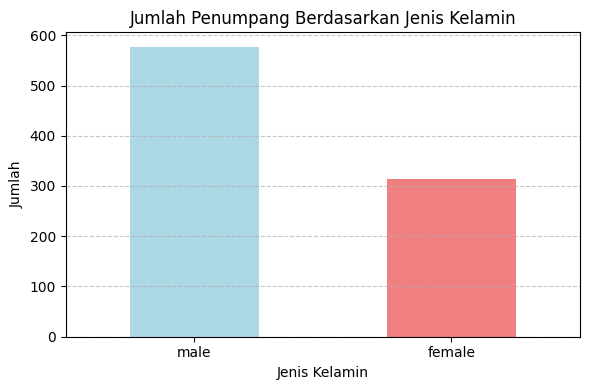

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Titanic-Dataset.csv")

# jumlah penumpang berdasarkan jenis kelamin
gender_counts = df['Sex'].value_counts()

# Menampilkan tabel
gender_counts_df = gender_counts.reset_index()
gender_counts_df.columns = ['Jenis Kelamin', 'Jumlah']
print(gender_counts_df)

# jenis kelamin yang lebih banyak
lebih_banyak = gender_counts.idxmax()
print(f"\nPenumpang dengan jumlah lebih banyak: {lebih_banyak}")

# Visualisasi
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


1.E

   Kelas  Jumlah
0      1     216
1      2     184
2      3     491

Persentase penumpang di kelas 1: 24.24%


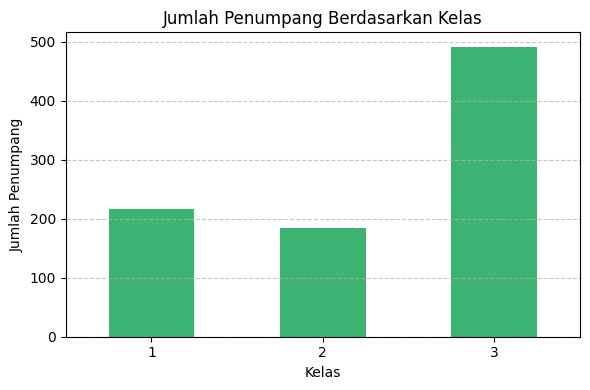

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Titanic-Dataset.csv")
kelas_counts = df['Pclass'].value_counts().sort_index()

# tabel penumpang berdasarkan kelas
kelas_df = kelas_counts.reset_index()
kelas_df.columns = ['Kelas', 'Jumlah']
print(kelas_df)
# persentase di kelas 1
total_penumpang = df.shape[0]
persen_kelas1 = (kelas_counts[1] / total_penumpang) * 100
print(f"\nPersentase penumpang di kelas 1: {persen_kelas1:.2f}%")

# Visualisasi grafik batang
plt.figure(figsize=(6, 4))
kelas_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


2.A

In [7]:
import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")

# Mengecek jumlah missing value di setiap kolom
missing_values = df.isnull().sum()

# Menampilkan hanya kolom yang memiliki missing value
missing_values = missing_values[missing_values > 0]
print("Kolom dengan missing value:")
print(missing_values)


Kolom dengan missing value:
Age         177
Cabin       687
Embarked      2
dtype: int64


2.B

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)  # rata-rata
# atau
df['Age'].fillna(df['Age'].median(), inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13912\1422690920.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)  # rata-rata
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13912\1422690920.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

2.C

In [11]:
import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")
# Hapus missing value 
age_data = df['Age'].dropna()

# Hitung Q1 dan Q3
Q1 = age_data.quantile(0.25)
Q3 = age_data.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Deteksi outlier
outlier_age = age_data[(age_data < batas_bawah) | (age_data > batas_atas)]
print("Jumlah outlier di kolom Age:", len(outlier_age))
print(outlier_age)
## outlier adalah data yang sangat berbeda atau menyimpang jauh dari nilai-nilai lainnya dalam satu set data.

Jumlah outlier di kolom Age: 11
33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


2.D

In [12]:
# Hapus outlier dari kolom 'Age'
df_clean = df.copy()
Q1 = df_clean['Age'].quantile(0.25)
Q3 = df_clean['Age'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean['Age'] >= batas_bawah) & (df_clean['Age'] <= batas_atas)]



In [15]:
import numpy as np

df['Fare_log'] = df['Fare'].apply(lambda x: np.log1p(x))  


2.E

In [17]:

# Mengisi missing value pada kolom 'Age' dengan rata-rata umur
df['Age'].fillna(rata_rata_umur, inplace=True)

# Mengisi missing value pada kolom 'Embarked' dengan modus (nilai yang paling sering muncul)
modus_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(modus_embarked, inplace=True)

# Mengisi missing value pada kolom 'Cabin' dengan string 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

# Menampilkan jumlah missing value setelah perbaikan
missing_values_after = df.isnull().sum()
print("Jumlah missing value setelah perbaikan:")
print(missing_values_after)

Jumlah missing value setelah perbaikan:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Fare_log       0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13912\250359052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(rata_rata_umur, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13912\250359052.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

3.A

Dalam proses machine learning, data perlu dibagi menjadi dua bagian utama, yaitu data training dan data testing. Data training digunakan untuk melatih model agar dapat mengenali pola-pola yang terdapat dalam data, sedangkan data testing digunakan untuk menguji performa model terhadap data yang belum pernah dilihat sebelumnya. Pembagian ini dilakukan untuk memastikan bahwa model yang dibangun tidak hanya bagus pada data pelatihan, tetapi juga mampu bekerja dengan baik saat dihadapkan pada data baru.

Proses pembagian biasanya dilakukan secara acak, dengan proporsi umum seperti 70% untuk data training dan 30% untuk data testing, atau 80% untuk training dan 20% untuk testing. Hal ini bertujuan untuk menjaga keseimbangan antara jumlah data yang cukup untuk pelatihan dan cukup juga untuk pengujian.

Alasan utama mengapa data harus dibagi adalah untuk menghindari overfitting, yaitu kondisi di mana model terlalu menyesuaikan diri dengan data training sehingga tidak mampu menggeneralisasi ke data lain. Selain itu, pembagian ini juga penting untuk mengukur sejauh mana model mampu melakukan prediksi pada data yang belum dikenalnya, sehingga evaluasi performa model menjadi lebih objektif dan akurat.

3.B

Dalam studi kasus prediksi kelangsungan hidup penumpang kapal Titanic, data dibagi menjadi dua bagian utama, yaitu 80% data training dan 20% data testing. Proporsi ini dipilih karena memberikan jumlah data pelatihan yang cukup besar untuk memungkinkan model mempelajari pola-pola kompleks dalam data, namun tetap menyisakan bagian data testing yang representatif untuk mengevaluasi performa model secara objektif.

Dataset Titanic mengandung informasi seperti usia penumpang, jenis kelamin, kelas tiket, jumlah anggota keluarga yang ikut, dan sebagainya, yang kemudian digunakan untuk memprediksi apakah seorang penumpang selamat atau tidak. Dengan membagi data menjadi 80% untuk pelatihan, model memiliki akses terhadap mayoritas data sehingga dapat mempelajari hubungan antara fitur-fitur tersebut dengan target prediksi secara lebih mendalam.

Sementara itu, 20% data testing digunakan untuk mengukur kemampuan generalisasi model, yaitu kemampuannya dalam melakukan prediksi pada data baru yang belum pernah dilihat sebelumnya. Pembagian ini juga membantu menghindari overfitting, yakni kondisi di mana model terlalu “hafal” data pelatihan namun tidak mampu beradaptasi dengan data nyata.

Dengan demikian, pembagian data sebesar 80:20 dalam studi kasus Titanic memberikan keseimbangan antara pembelajaran yang optimal dan evaluasi yang objektif, sehingga model yang dihasilkan lebih andal dan akurat saat digunakan dalam situasi dunia nyata.



3.C

In [16]:
from sklearn.discriminant_analysis import StandardScaler


data = pd.read_csv("Titanic-Dataset.csv")


data['Age'] = data['Age'].fillna(np.mean(data['Age']))
data.dropna(subset=['Embarked'], inplace=True)
data.drop('Cabin', axis=1, inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
data['Embarked'] = data['Embarked'].map(embarked_mapping)

print(data[['Sex', 'Embarked']].head())
Features = data.drop(columns=["PassengerId", "Survived", "Name", "Ticket"])
Goal = data["Survived"]
Features = StandardScaler().fit_transform(Features)
Features = pd.DataFrame(Features)
Features.columns=["pclass","Sex", "Age","SibSp","Parch","Fare","Embarked"]
X_train, X_test, Y_train, Y_test = train_test_split(Features, Goal, test_size= 0.2, random_state=1)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
report_knn =  classification_report(Y_test, y_pred_knn)

print("Akurasi Klasifikasi:", accuracy_knn)
print("Laporan Klasifikasi:\n", report_knn)

   Sex  Embarked
0    0         2
1    1         0
2    1         2
3    1         2
4    0         2
Akurasi Klasifikasi: 0.8089887640449438
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.67      0.74        73

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.80       178



Confusion Matrix:
 [[95 10]
 [24 49]]


<Axes: >

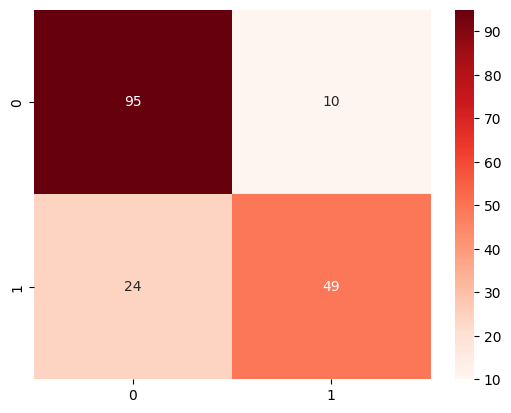

In [17]:
CM_knn = confusion_matrix(Y_test, y_pred_knn)
print("Confusion Matrix:\n", CM_knn)
sns.heatmap(CM_knn, annot= True, cmap= 'Reds')

Model Logistic Regression
Regresi logistik adalah algoritma machine learning untuk klasifikasi. Model ini menghitung probabilitas suatu data masuk ke dalam kelas tertentu. Algoritma ini bekerja dengan terlebih dahulu menghitung kombinasi linear dari fitur-fitur input, kemudian hasilnya dimasukkan ke dalam fungsi sigmoid. Fungsi sigmoid akan mengubah nilai tersebut menjadi angka antara 0 dan 1, yang diinterpretasikan sebagai probabilitas. Jika probabilitas lebih dari 0.5, maka data diklasifikasikan sebagai kelas 1, dan jika kurang dari atau sama dengan 0.5 maka diklasifikasikan sebagai kelas 0. Model ini belajar dengan menyesuaikan bobot (koefisien) melalui proses optimasi seperti gradient descent untuk meminimalkan kesalahan prediksi.

In [18]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression()
model.fit(X_train_pca, Y_train)
y_pred_LR = model.predict(X_test_pca)
report_LR= classification_report(Y_test, y_pred_LR)

accuracy_LR = accuracy_score(Y_test, y_pred_LR)
print("Akurasi Klasifikasi:", accuracy_LR)
print("Laporan Klasifikasi:\n", report_LR)

Akurasi Klasifikasi: 0.8370786516853933
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.79      0.80        73

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



Confusion Matrix:
 [[91 14]
 [15 58]]


<Axes: >

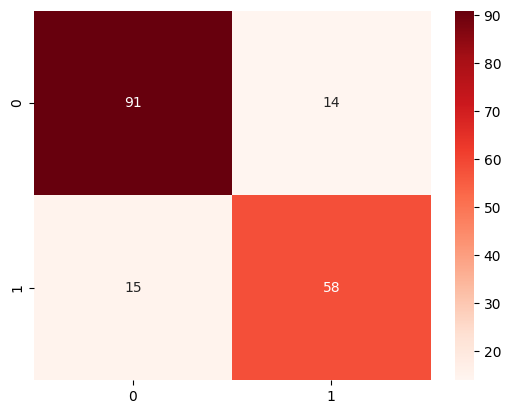

In [19]:
CM_LR = confusion_matrix(Y_test, y_pred_LR)
print("Confusion Matrix:\n", CM_LR)
sns.heatmap(CM_LR, annot= True, cmap= 'Reds')

Model Neural Network

Neural Network adalah algoritma pembelajaran mesin yang terinspirasi oleh cara kerja otak manusia, dengan struktur yang terdiri dari lapisan input, lapisan tersembunyi (hidden layers), dan lapisan output. Setiap neuron dihubungkan ke neuron lain dengan bobot yang dapat dipelajari. Input melalui neuron pertama akan diteruskan melalui jaringan, dan setiap bobot akan mempengaruhi hasil akhir. Output dihitung dengan melakukan operasi matematika (biasanya perkalian matriks) pada input dan bobot, kemudian melewati fungsi aktivasi untuk memperkenalkan non-linearitas.Proses pelatihan menggunakan metode seperti backpropagation untuk memperbarui bobot berdasarkan kesalahan prediksi.

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(6, 4), max_iter=1000, alpha=0.01, random_state=42)
mlp.fit(X_train, Y_train)
Y_pred_MLP = mlp.predict(X_test)
report_MLP = classification_report(Y_test, Y_pred_MLP)

accuracy_MLP = accuracy_score(Y_test, Y_pred_MLP)
print("Akurasi Klasifikasi:", accuracy_MLP)
print("Laporan Klasifikasi:\n", report_MLP)

Akurasi Klasifikasi: 0.8314606741573034
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       105
           1       0.88      0.68      0.77        73

    accuracy                           0.83       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.84      0.83      0.83       178



Confusion Matrix:
 [[98  7]
 [23 50]]


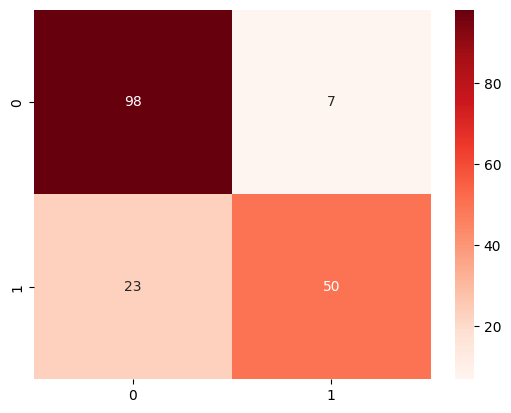

In [24]:
CM_MLP = confusion_matrix(Y_test, Y_pred_MLP)
print("Confusion Matrix:\n", CM_MLP)
sns.heatmap(CM_MLP, annot=True, cmap='Reds')
plt.show()

3.D

In [25]:
print(f"evaluasi model KNN: \n {report_knn}")
print(f"evaluasi model regresi logistik: \n {report_LR}")
print(f"evaluasi model Neural Network: \n {report_MLP}")

evaluasi model KNN: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.67      0.74        73

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.80       178

evaluasi model regresi logistik: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.79      0.80        73

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178

evaluasi model Neural Network: 
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       105
           1       0.88      0.68      0.77        73

    accuracy                           0.83       178
   macro avg       0.84      0.81     

Metrik-metrik evaluasi :

Akurasi (Accuracy): Persentase prediksi yang benar dari total data.
Precision: Proporsi prediksi positif yang benar dari semua prediksi positif.
Recall (Sensitivity atau True Positive Rate): Proporsi data positif yang benar-benar terdeteksi sebagai positif.
F1-Score: Rata-rata harmonis antara Precision dan Recall.

3.E

Regresi logistik memiliki accuracy tertinggi (84%), dan nilai precision, recall, serta f1-score yang stabil di antara kelas 0 dan 1. Ini menunjukkan bahwa model ini cukup konsisten dalam memprediksi kedua kelas, tidak terlalu bias ke salah satu.

4.A

In [26]:
print("Akurasi Klasifikasi:", accuracy_LR)
print("Laporan Klasifikasi:\n", report_LR)

Akurasi Klasifikasi: 0.8370786516853933
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.79      0.80        73

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



Berdasarkan laporan diatas

Precision untuk penumpang selamat adalah 0.86
Recall untuk penumpang selamat adalah 0.73

4.B

In [27]:
# Jumlah yang diprediksi selamat (prediksi = 1)
jumlah_prediksi_selamat = np.sum(y_pred_LR == 1)

# Jumlah yang benar-benar selamat di antara prediksi = 1
jumlah_benar_selamat = np.sum((y_pred_LR == 1) & (Y_test == 1))

print(f"Jumlah penumpang yang diprediksi selamat: {jumlah_prediksi_selamat}")
print(f"Jumlah di antaranya yang benar-benar selamat: {jumlah_benar_selamat}")

Jumlah penumpang yang diprediksi selamat: 72
Jumlah di antaranya yang benar-benar selamat: 58
